<h1 style="color:green;"><b> Ashray Kothari </b></h1>

<h3 style="color:red"> <b>The Sparks Foundation</b> : Data Science and Analytics Internship </h3>
<h3 style="color:red"> <b>Batch</b> : June 2022 </h3>

<h3> <b>Task 4</b>: Perform EDA on the dataset of "Global Terrorism".</h3>

In [1]:
# Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

<h3><b> Preparing Dataset </b> </h3>

In [2]:
df = pd.read_csv('globalterrorism.csv', encoding='ISO-8859-1')
df.rename(columns={'iyear': 'Year','imonth':'Month', 'iday':'Day','country_txt':'Country', 'region_txt': 'Region', 'attacktype1_txt':'AttackType', 'target1':'Target', 'nkill': 'Killed', 'nwound':'Wounded', 'summary': 'Summary', 'gname': 'Group', 'targtype1_txt':'Target_type',
'weaptype1_txt' : 'Weapon_type', 'motive': 'Motive' }, inplace=True) 
df = df[['Year', 'Month', 'Day', 'Country', 'Region','city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive']] 
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [4]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [5]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [6]:
df['city'].fillna('NA',inplace=True)
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)
df['Killed'].fillna(int(df['Killed'].median()),inplace=True)
df['Wounded'].fillna(int(df['Wounded'].median()),inplace=True)
df['Target'].fillna('NA',inplace=True)
df['Summary'].fillna('NA',inplace=True)
df['Motive'].fillna('NA',inplace=True)

In [7]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [8]:
df['Day'].unique(), df['Month'].unique()

(array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
        25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29],
       dtype=int64),
 array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64))

<b> Some of the days and months have been written as 0 which is not possible. Thus we assign them value 1. </b>

In [9]:
df['Day'] = df['Day'].apply(lambda x: 1 if x == 0 else x)
df['Month'] = df['Month'].apply(lambda x: 1 if x == 0 else x)

In [10]:
df['Day'].unique(), df['Month'].unique()

(array([ 2,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25,
        26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29],
       dtype=int64),
 array([ 7,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64))

<h2><b> Exploratory Data Analysis </b></h2>

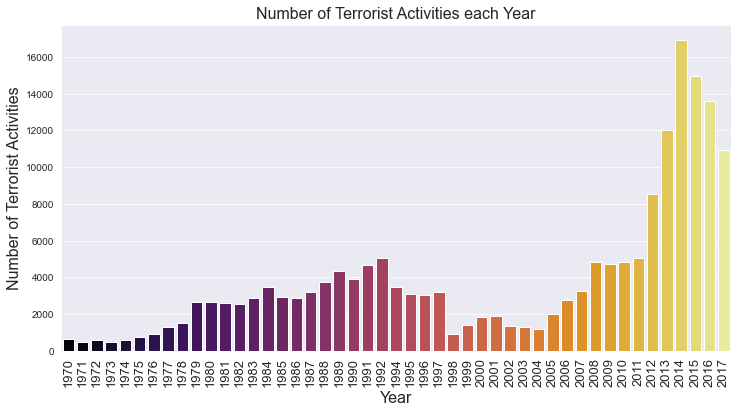

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Year', data=df, palette='inferno')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Terrorist Activities', fontsize=16)
plt.xticks(rotation=90, fontsize=13,ha='center')
plt.title('Number of Terrorist Activities each Year', fontsize=16)
plt.show()

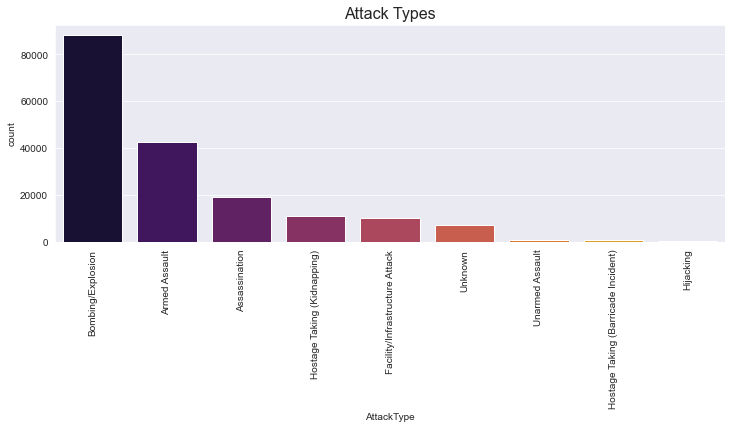

In [12]:
# Attack Types
plt.subplots(figsize=(12,4)) 
sns.countplot(df['AttackType'], palette='inferno',order=df['AttackType'].value_counts().index) 
plt.xticks(rotation=90) 
plt.title('Attack Types', fontsize=16) 
plt.show()

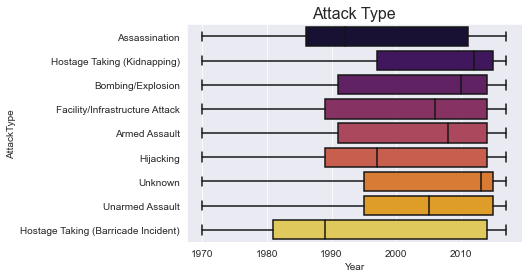

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Year", y="AttackType", data=df, whis=[0, 100], palette='inferno')
plt.title("Attack Type", fontsize=16)
plt.show()

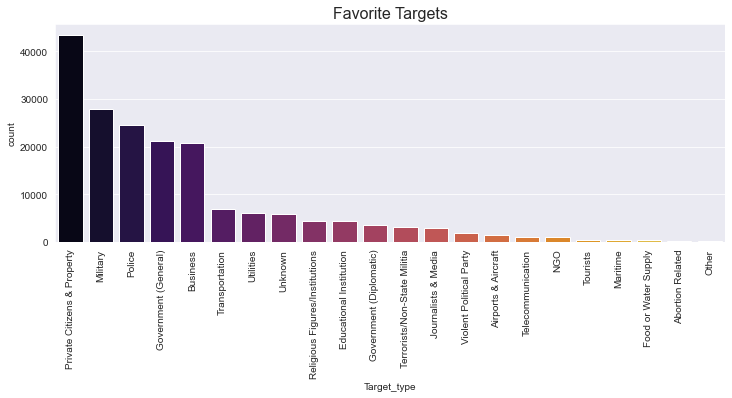

In [14]:
# Favorite Targets 
plt.subplots(figsize=(12,4)) 
sns.countplot(df['Target_type'], palette='inferno',order=df['Target_type'].value_counts().index) 
plt.xticks(rotation=90) 
plt.title('Favorite Targets', fontsize=16) 
plt.show()

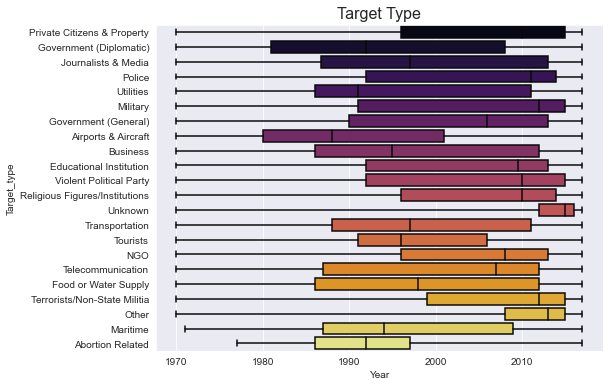

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Year", y="Target_type", data=df, whis=[0, 100], palette='inferno')
plt.title("Target Type", fontsize=16)
plt.show()

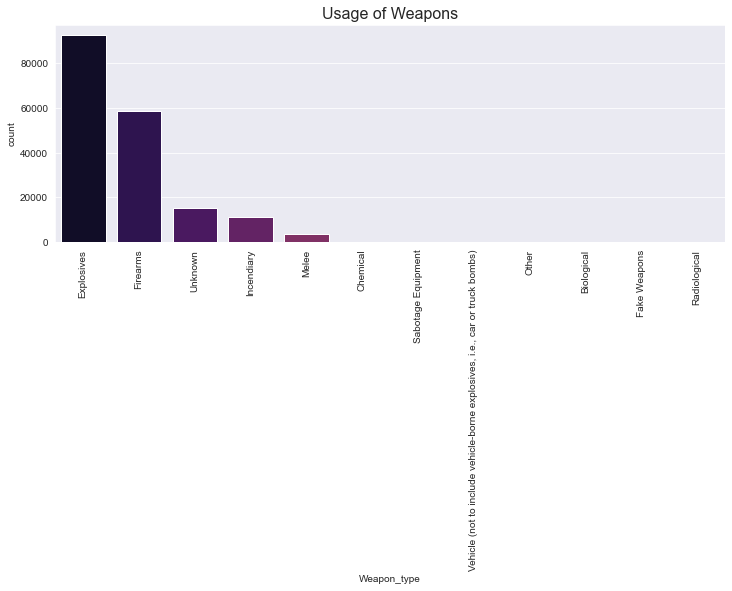

In [16]:
# Weapon Types
plt.subplots(figsize=(12,4)) 
sns.countplot(df['Weapon_type'], palette='inferno',order=df['Weapon_type'].value_counts().index) 
plt.xticks(rotation=90) 
plt.title('Usage of Weapons', fontsize=16) 
plt.show()

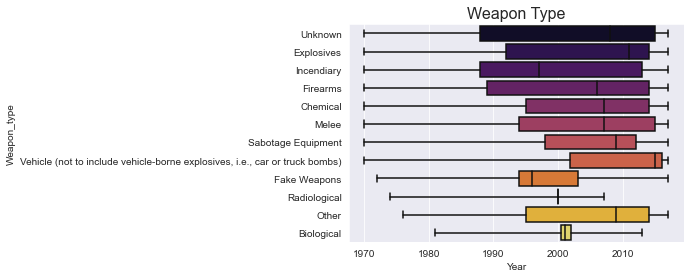

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Year", y="Weapon_type", data=df, whis=[0, 100], palette='inferno')
plt.title("Weapon Type", fontsize=16)
plt.show()

In [18]:
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
df['Casualties'] = df['Killed'] + df['Wounded']
df1 = df.sort_values(by='Casualties',ascending=False)[:100]
heat = df1.pivot_table(index='Country',columns='Year',values='Casualties')
heat.fillna(0,inplace=True)
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 100 Worst Terror Attacks in History from 1978 to 2017')
fig = go.Figure(data=data, layout=layout)
py.plot(fig, filename='heatmap')

'heatmap.html'

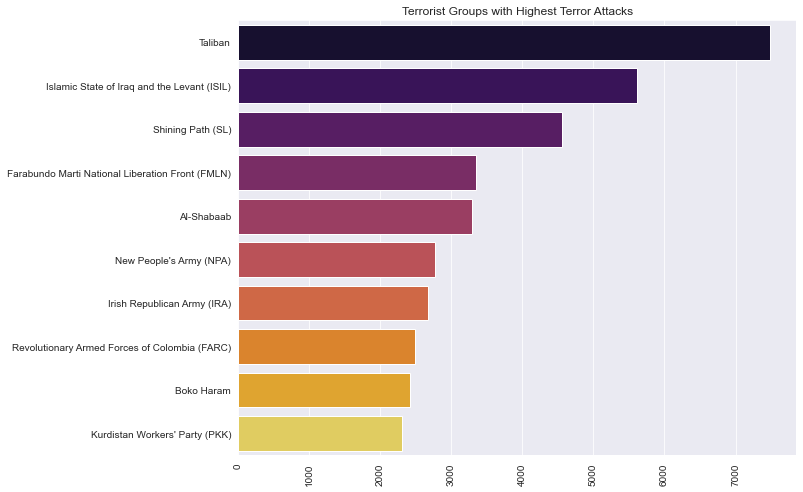

In [19]:
# Terrorist Groups 
sns.barplot(df['Group'].value_counts()[1:11].values, df['Group'].value_counts()[1:11].index, palette=('inferno')) 
plt.xticks(rotation=90) 
fig=plt.gcf() 
fig.set_size_inches(10,8) 
plt.title('Terrorist Groups with Highest Terror Attacks') 
plt.show()

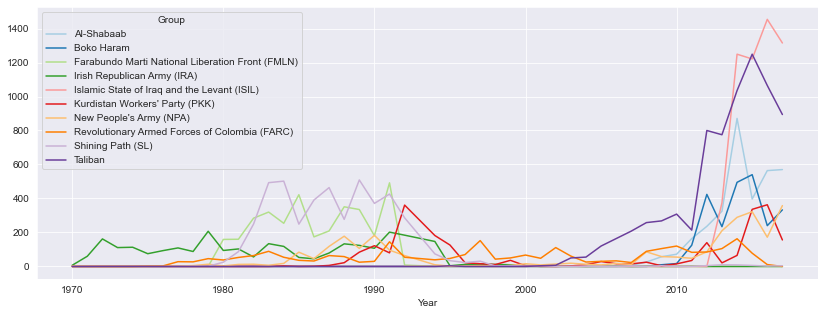

In [20]:
# Terrorist Groups By Year 
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)] 
pd.crosstab(top_groups10.Year, top_groups10.Group).plot(color=sns.color_palette('Paired',10)) 
fig=plt.gcf() 
fig.set_size_inches(14,5) 
plt.show()

<p><b> Taliban and ISIL have increased their activities in recent years. </b></p>

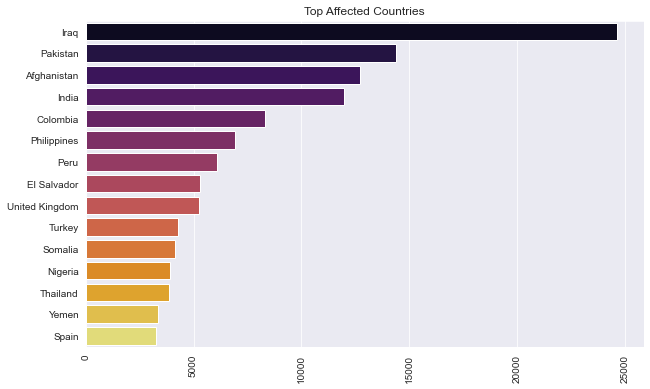

In [21]:
# Terrorism by Country 
sns.barplot(df['Country'].value_counts()[:15].values, df['Country'].value_counts()[:15].index, palette=('inferno')) 
plt.xticks(rotation=90) 
fig=plt.gcf() 
fig.set_size_inches(10,6) 
plt.title('Top Affected Countries') 
plt.show()

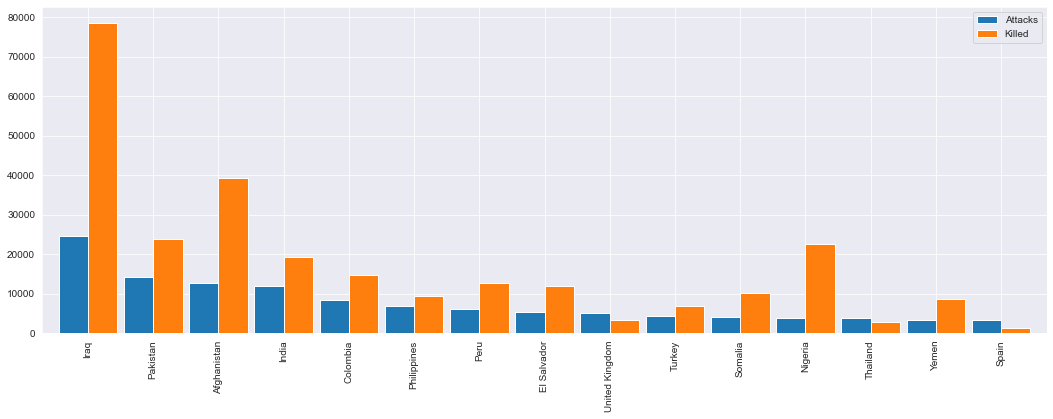

In [22]:
# Number of Attacks v Killed 
coun_terror = df['Country'].value_counts()[:15].to_frame() 
coun_terror.columns=['Attacks'] 
coun_kill=df.groupby('Country')['Killed'].sum().to_frame() 
coun_terror.merge(coun_kill, left_index=True, right_index=True, how="left").plot.bar(width=0.9) 
fig=plt.gcf() 
fig.set_size_inches(18,6) 
plt.show()

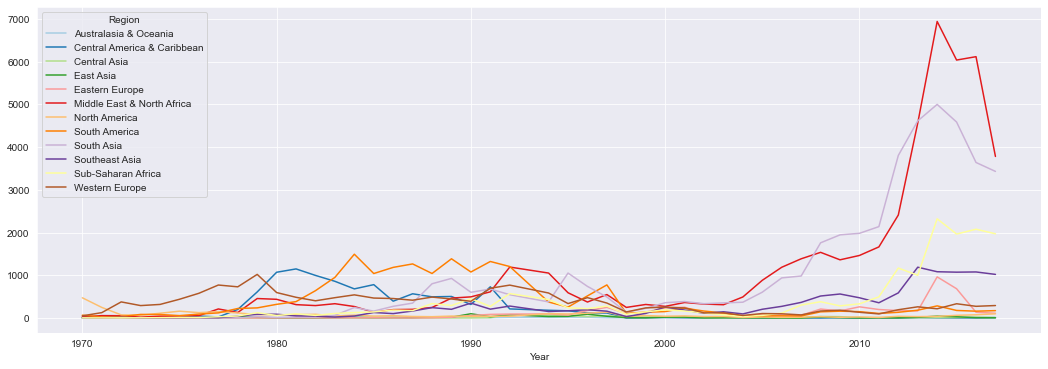

In [23]:
# Trends in Terrorism 
terror_region=pd.crosstab(df.Year, df.Region) 
terror_region.plot(color=sns.color_palette('Paired', 12)) 
fig=plt.gcf() 
fig.set_size_inches(18,6) 
plt.show() 

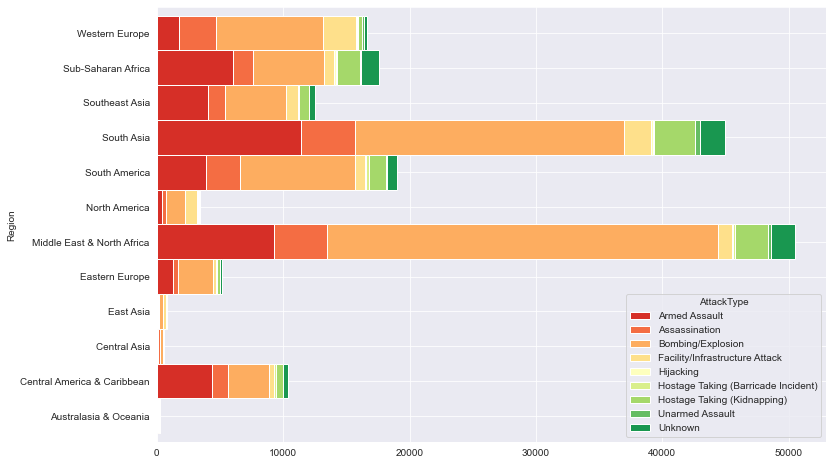

In [24]:
# Attack Type v Region 
pd.crosstab(df.Region, df.AttackType).plot.barh(stacked=True, width=1, color=sns.color_palette('RdYlGn',9)) 
fig=plt.gcf()
fig.set_size_inches(12,8) 
plt.show()

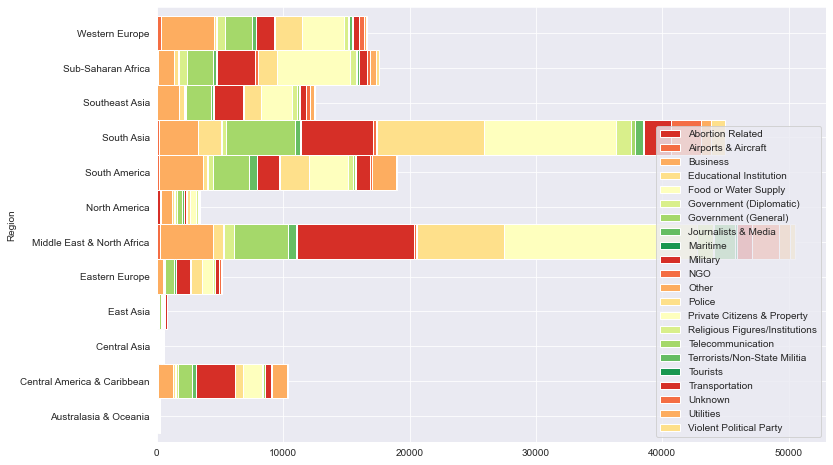

In [25]:
pd.crosstab(df.Region, df.Target_type).plot.barh(stacked=True, width=1, color=sns.color_palette('RdYlGn',9)) 
fig=plt.gcf()
fig.set_size_inches(12,8) 
plt.legend(loc='lower right')
plt.show()

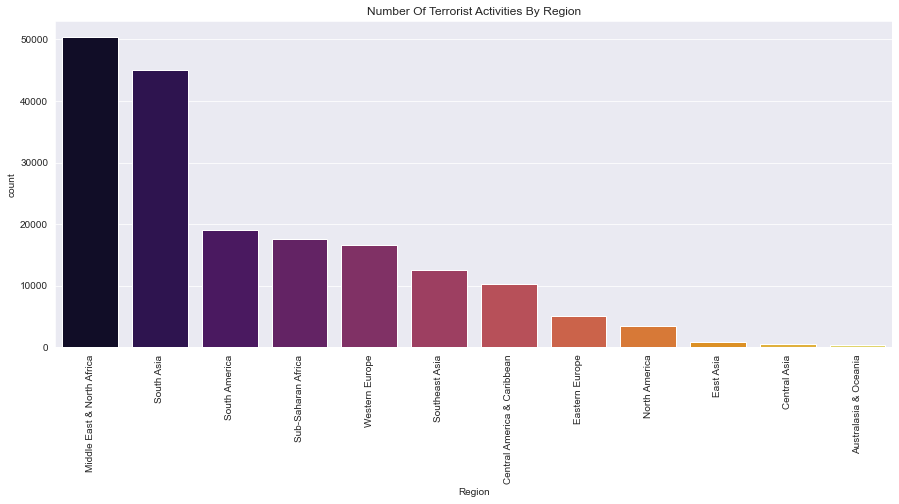

In [26]:
# Terrorism by Region 
plt.subplots(figsize=(15,6)) 
sns.countplot('Region',data=df, palette='inferno', order=df['Region'].value_counts().index) 
plt.xticks(rotation=90) 
plt.title('Number Of Terrorist Activities By Region') 
plt.show() 

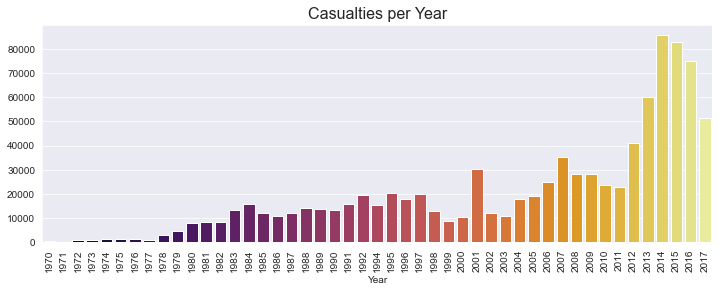

In [27]:
cyear = df.groupby(['Year'])['Casualties'].sum()
sns.barplot(cyear.index, cyear.values, palette=('inferno'))
plt.xticks(rotation=90) 
fig=plt.gcf() 
fig.set_size_inches(12,4) 
plt.title('Casualties per Year', fontsize=16)
plt.show()

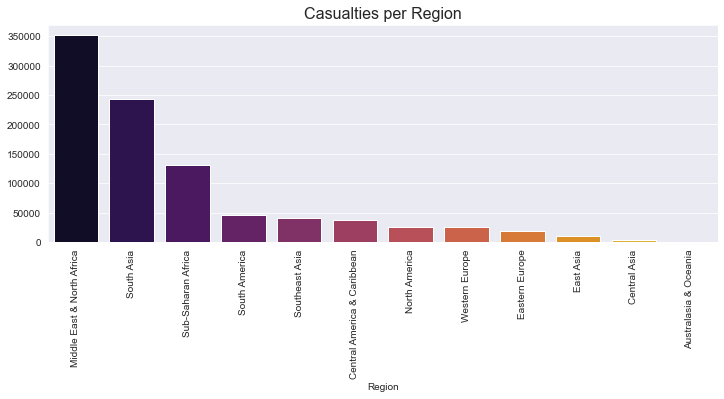

In [28]:
cregion = df.groupby(['Region'])['Casualties'].sum().sort_values(ascending=False)
sns.barplot(cregion.index, cregion.values, palette=('inferno'))
plt.xticks(rotation=90) 
fig=plt.gcf() 
fig.set_size_inches(12,4) 
plt.title('Casualties per Region', fontsize=16)
plt.show()

In [29]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) 
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())
print("Most Target Types:",df['Target_type'].value_counts().idxmax())
print('Maximum people killed in an attack are', int(df['Killed'].max()), 'that took place in', df.loc[df['Killed'].idxmax()]. Country)

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
Most Target Types: Private Citizens & Property
Maximum people killed in an attack are 1570 that took place in Iraq


<h3><b>Observations </b></h3>

<ul>
<li> There has been a gradual increase in Terror Activities since 2004.</li>
<li> Highest number of terror activities occurred in the year 2014. </li>
<li> Highest number of casualties have also occured in the year 2014. </li>
<li> After 2014 the terror activities started to decrease. </li>
<li> There have been very less terror activities and casualties in East and Central Asia. </li>
<li> The Worst Attack took place in the US in the year 2001 with a total casualty of 9574. After the 9/11 attack the security measures in the US were escalated in such a way that no major attacks took place until the year 2017. </li>
<li> Kenya had the 2nd worst attack in the 1998 with 4224 Casualties, after that proper security measures were taken to avoid any such incident. </li>
<li> India had its worst attack in the year 2006 with 1005 caualties.
<li> Mostly there is usage of Explosives and Firearms as Weapons. </li>
<li> Most attacks have been carried out on Private citizens followed by military.</li>
</ul>